# Milestone 3: Beyond Descriptive Stats

## Author: Gaurab Kundu

This Notebook refers to the third week of the final project of the Learn SQL Basics for Data Science Specialization.

In [8]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
# loading the necessary data

summer_events = pd.read_csv('E:/UNIVERSITY OF CALIFORNIA DEVIS/Learn SQL Basics for Data Science Specialization/4 SQL for Data Science Capstone/UCDavis-SQL-for-Data-Science-Capstone-Project/Week 3/summer_events.csv')
winter_events = pd.read_csv('E:/UNIVERSITY OF CALIFORNIA DEVIS/Learn SQL Basics for Data Science Specialization/4 SQL for Data Science Capstone/UCDavis-SQL-for-Data-Science-Capstone-Project/Week 3/winter_events.csv')

In [3]:
#Summer Olympics:
summer_medal_count = pysqldf('''
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               summer_events
                             GROUP BY
                               Year 
                                   ''')

In [4]:
#Winter Olympics:
winter_medal_count = pysqldf('''
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               winter_events
                             GROUP BY
                               Year 
                                   ''')

I just created two tables to count the total number of medals in the winter and summer olympics. I will calculate the Pearson correlation coefficient between the total number of medals in the winter and summer olympics.

In [5]:
print(summer_medal_count.head())

   Year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1896          380          143          62            43            38
1  1900         1936          604         201           228           175
2  1904         1301          486         173           163           150
3  1906         1733          458         157           156           145
4  1908         3101          831         294           281           256


In [6]:
print(winter_medal_count.head())

   Year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1924          460          130          55            38            37
1  1928          582           89          30            28            31
2  1932          352           92          32            32            28
3  1936          895          108          36            37            35
4  1948         1075          135          41            48            46


In [9]:
print(summer_medal_count)

    Year  total_count  medal_count  gold_count  silver_count  bronze_count
0   1896          380          143          62            43            38
1   1900         1936          604         201           228           175
2   1904         1301          486         173           163           150
3   1906         1733          458         157           156           145
4   1908         3101          831         294           281           256
5   1912         4040          941         326           315           300
6   1920         4292         1308         493           448           367
7   1924         5233          832         277           281           274
8   1928         4992          734         245           239           250
9   1932         2969          647         229           214           204
10  1936         6506          917         312           310           295
11  1948         6405          852         289           284           279
12  1952         8270    

The length of the array of the number of medal count in the winter Olympics and summer Olympics are different because Winter olympics started in 1924, but Summer olympics started in 1896. Therefore I have to create a new shortened table of the summer olympics started in 1924 to match the length of the winter olympics.

In [7]:
summer_medal_count_new = summer_medal_count[7:]

In [11]:
print(summer_medal_count_new)

    Year  total_count  medal_count  gold_count  silver_count  bronze_count
7   1924         5233          832         277           281           274
8   1928         4992          734         245           239           250
9   1932         2969          647         229           214           204
10  1936         6506          917         312           310           295
11  1948         6405          852         289           284           279
12  1952         8270          897         306           291           300
13  1956         5127          893         302           293           298
14  1960         8119          911         309           294           308
15  1964         7702         1029         347           339           343
16  1968         8588         1057         359           340           358
17  1972        10304         1215         404           392           419
18  1976         8641         1320         438           434           448
19  1980         7191    

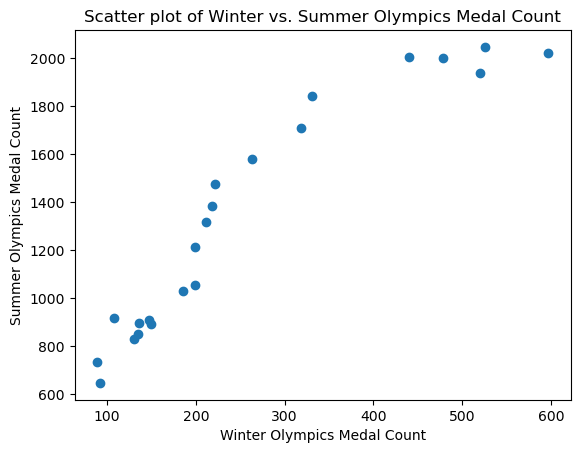

Slope: 2.932952625695963
Intercept: 573.3561271209765


In [13]:
import matplotlib.pyplot as plt

# Scatter plot
x_simple = winter_medal_count.medal_count
y_simple = summer_medal_count_new.medal_count

plt.scatter(x_simple, y_simple)
plt.xlabel("Winter Olympics Medal Count")
plt.ylabel("Summer Olympics Medal Count")
plt.title("Scatter plot of Winter vs. Summer Olympics Medal Count")
plt.show()

# Linear Regression
slope, intercept = np.polyfit(x_simple, y_simple, 1)
print("Slope:", slope)
print("Intercept:", intercept)


I then calculate the Pearon correlation coefficient between the total number of medals in the winter and summer olympics from 1924 to 2016.

In [9]:
x_simple = winter_medal_count.medal_count
y_simple = summer_medal_count_new.medal_count
my_rho = np.corrcoef(x_simple, y_simple)

In [10]:
print(my_rho)

[[1.         0.94141801]
 [0.94141801 1.        ]]


The Pearon correlation coefficient between the total number of medals in the winter and summer olympics from 1924 to 2016, is 0.94, which is highly positive. Therefore, the performance of a country in winter olympics is highly correlated to that in summer olympics

I will then calculate the standard deviation in country performance through years.  A Comparison between average std of Winter and that of  Summer Olympics will help.

In [11]:
std_medal_count_summer_olympics = np.std(y_simple)
std_medal_count_winter_olympics = np.std(x_simple)

In [12]:
print("std_medal_count_summer_olympics =",std_medal_count_summer_olympics)
print("std_medal_count_winter_olympics =",std_medal_count_winter_olympics)

std_medal_count_summer_olympics = 475.323015441357
std_medal_count_winter_olympics = 152.56899942903493


From 1924 to 2016, as the standard deviation in the summer olympics is about 3 times that in the winter olympics,  country performance by year change more in  Summer Olympics.

## Relationships and Corelation:

Based on the analysis of the Olympic medal data, two correlations stand out:

- Correlation between Winter and Summer Olympics Medal Counts: The Pearson correlation coefficient of 0.94 suggests a strong positive correlation between the total number of medals won by countries in the Winter and Summer Olympics from 1924 to 2016. 

- This indicates that countries that perform well in one type of Olympics tend to perform well in the other type as well.

- Standard Deviation in Medal Counts: The standard deviation in the summer Olympics (475.32) was found to be approximately three times that of the winter Olympics (152.57). 

- This implies that the performance of countries in the Summer Olympics varies more widely over the years compared to the Winter Olympics.

## Linear Regression for future prediction (if the relationship is linear)

 After plotting the scatter plot and calculating the linear regression  of the total medal counts in the Winter Olympics (x-axis) against the total medal counts in the Summer Olympics (y-axis) to check the linearity of the relationship.  if the slope is close to 1 and the intercept is close to 0, it would suggest a linear relationship between the medal counts in Winter and Summer Olympics.  

As the  Slope: 2.932952625695963 

Intercept: 573.3561271209765  

Its not linear.


## Textual Analysis using TF-IDF

To conduct textual analysis, we would need text-based data, such as articles, reports, or descriptions of countries' performances in the Olympics. By applying Term Frequency-Inverse Document Frequency (TF-IDF) analysis with stop-word removal, we could identify key terms and themes associated with countries' Olympic performances. This analysis could help us understand the factors that contribute to their success or failure in the games.

## Go Broader

To go broader, we can investigate additional factors that may influence a country's performance in the Olympics. Some potential features to explore include:

- Economic Indicators: Studying a country's economic indicators, such as GDP, GDP per capita, and economic growth, could reveal how economic factors influence Olympic success.

- Population and Athlete Participation: Analyzing the population size and the number of athletes representing each country in the Olympics could shed light on how a larger population or a higher number of athletes may impact medal count.

- Sports Development Programs: Exploring the presence and effectiveness of sports development programs in different countries could provide insights into their ability to nurture and train athletes for success in various sports.

## New Metrics

- Medal Conversion Ratio: Created a new metric that measures the ratio of gold medals to total medals won by each country. 

- A higher medal conversion ratio could indicate that a country's athletes are particularly successful at winning gold medals, suggesting excellence in specific sports.

- Host Country Advantage Index: Designed a metric to assess the performance of the host country in each Olympics compared to their overall historical performance. 

- This index could help identify whether being the host country provides any advantage in terms of medal count or overall performance.

These new metrics could offer additional perspectives on the relationship between countries' Olympic performances and provide valuable insights into factors contributing to success or variations in performance across different Olympic events.

